In [1]:
import pandas as pd

df = pd.read_csv("AmesHousing.csv")
print(df.head())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

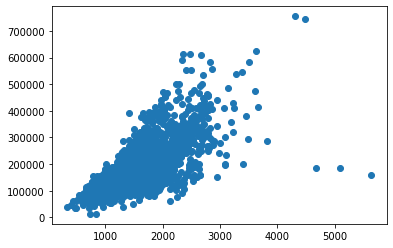

In [2]:
import matplotlib.pyplot as plt

x = df["Gr Liv Area"]
y = df["SalePrice"]

plt.scatter(x, y)
plt.show()

## Correlation
Let's quantify the strength of the (linear relationship) between x and y:
* Correlation $r$
    * $r$ in `[-1.0, 1.0]`
    * 1.0 means perfect positive linear correlation (as x increases, so does y; as x decreases so does y)
    * -1.0 means perfect inverse linear correlation (as x increases, y decreases; as x decreases, y increases)
    * At or near 0.0 means no (linear) relationship between x and y (they are seemingly independent)
* Correlation does not imply causation!

In [3]:
import scipy.stats as stats

r, pval = stats.pearsonr(x, y)
print("r:", r, "p:", pval)

r: 0.7067799209766277 p: 0.0


## Intro to Regression
* Recall: if the class we want to predict is numeric -> regression task
* There are lots of regression algorithms
    * Linear regression (DA7)
    * kNN regressor
    * Decision tree regressor
    * Etc. 
* Goal: to fit a line to our x, y (ground living SF, sales price) data so we can use the linear model to make sale price predictions for "unseen" homes (like zillow's Zestimate, etc.)
    * We will use simple linear regression (DA7 you'll do multiple linear regression)
    * Recall: y = mx + b (m is the slope; b is the intercept)
    * If we can find m and b for our x, y data, then we can make predictions!

In [4]:
# first, divide our dataset into training and testing using holdout method
from sklearn.model_selection import train_test_split

X = x.to_frame() # convert 1D series -> 2D dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=0)

coefficients: [111.60745121]
m: 111.60745121311004 b: 13460.486687256926


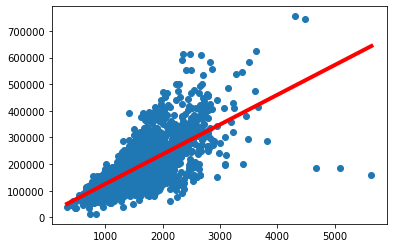

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print("coefficients:", lin_reg.coef_)
m = lin_reg.coef_[0]
b = lin_reg.intercept_
print("m:", m, "b:", b)

# GS adding after class
x_train = X_train.iloc[:, 0] # back to 1D for plotting
plt.scatter(x_train, y_train)
# show the fit line
plt.plot([x_train.min(), x_train.max()], [m * x_train.min() + b, m * x_train.max() + b], lw=4, c="red")
plt.show()

In [6]:
# let's use m and b to make a prediction for the first test instance
x_unseen = X_test.iloc[0, 0]
y_unseen = y_test.iloc[0]
y_pred = m * x_unseen + b
print("y predicted:", y_pred, "y actual:", y_unseen, "error (residual):", y_unseen - y_pred)

y predicted: 235670.922052559 y actual: 220000 error (residual): -15670.922052559006


In [7]:
# predictions for the whole test set!
y_predicted = lin_reg.predict(X_test)
residuals = y_test - y_predicted
print(residuals)
mae = residuals.abs().mean() # mean absolute error
print(mae) # can you do better?? DA7!!

2216   -15670.922053
836     19048.136612
2396    47672.834423
1962    -5023.336363
305    -42158.064216
1139   -11036.875689
727    -58411.625304
1663    20302.603673
2817   -27177.010166
1511   -47835.857948
Name: SalePrice, dtype: float64
29433.72664459201


## Regression Evaluation Metrics
The goal is to quantify the relationship between variables (e.g. x and y, y_test and y_predicted, etc.)
* There are several metrics
    * MAE
    * Correlation
    * Coefficient of determination
        * $R^2$ in the range `[0.0, 1.0]`
        * Proportion of variation in y that is explained by x
        * The higher the $R^2$, the stronger relationship between x and y
        * This is the default scoring metric for regression in sci kit learn

In [8]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_predicted)
print("R2:", r2)
r2 = lin_reg.score(X_test, y_test)
print("R2:", r2)
# 70% of the variation in y_predicted is explained by y_test
# the other 30% is the error (unexplained)

R2: 0.7039305388456224
R2: 0.7039305388456224
